# Problema 2

### Importing libraries

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

### Creating data

In [2]:
def generate_points(points_number, mean, std):
    """
    Given an amount of points, a mean & a standard deviation
    generates a tensor with randon 3D points
    - param points_number: Amout of required 3D points
    - param mean = Mean for Gaussian distribution
    - param std = Standard desviation for Gaussian distribution
    - return X: Tensor with all 3D points generated
    """
    
    #Creating Gaussians values (epsilon)
    epsilon = torch.normal(mean, std, size=(1, points_number))
    
    #Creating random X,Y values
    Xrand_Yrand = torch.rand(2, points_number)
    
    #Computing f(x, y)
    f_x_y = 0.2*Xrand_Yrand[0, :] + Xrand_Yrand[1, :] + epsilon
    
    #Creating X
    X = torch.cat((Xrand_Yrand, f_x_y), dim = 0)
    
    #Plotting points
    # Creating figure
    fig = plt.figure()
    ax = plt.axes(projection = "3d")
     # Creating plot
    ax.scatter3D(X[0, :], X[1, :], X[2, :])
    # show plot
    plt.show()    
    
    #Returning data
    return X

### Computing covariance matrix

In [3]:
def cov_matrix(data):
    """
    Computes covariance matrix using Pytorch
    - param data: Dataset which will have its
    - covariance matrix computed
    - return cov_matrix: Covariance matrix of the 
    given data
    """
    
    #Computing covariance matrix
    cov_matrix = torch.cov(data)
    
    #Printing covariance matrix dimensions
    print("Covariance matrix dimensions are: [{}, {}]\n".format(cov_matrix.shape[0], cov_matrix.shape[1]))
    
    #Returning covariance matrix
    return cov_matrix

### Computing eigenvectors & eigenvalues

In [4]:
def eigenvectors_eigenvalues(cov_matrix):
    """
    Computes eigenvalues and eigenvectors using numpy
    - param cov_matrix: Dataset covariance matrix
    - return v, w: Eigenvalues & eigenvector
    """
    
    #Computing eigenvalues and eigenvectors
    d, w = np.linalg.eigh(cov_matrix)
    
    #Parsing into PyTorch tensors
    d = torch.tensor(d)
    w = torch.tensor(w)
    
    #Printing eigenvalues
    print("The eigenvalues are: {}\n".format(d))
    
    #Printing eigenvectors
    print("The eigenvectors are:\n")
    print("w1: {}\n".format(w[0]))
    print("w2: {}\n".format(w[1]))
    print("w3: {}\n".format(w[2]))
    
    #Returning eigenvalues and eigenvector
    return d, w

### Creating new subspace

In [5]:
def creating_subspace(d, w):
    """
    Sorts the eigenvalues in descending orders to 
    get its eigenvectors and creates a new subspace
    - param d, w: Eigenvalues & eigenvectors
    - return V: New subspace created using the two highest
    eigenvalues and their respective eigenvectors
    """
     
    #Sorting eigenvalues in descending order
    sort_d, idx = torch.sort(d, descending = True)

    #Grabing eigenvectors of the two highest eigenvalues
    v1 = w[idx[0]]
    v2 = w[idx[1]]
    
    #Creating subspace V
    V = torch.stack((v1,v2), 1)
    
    #Printing V
    print("Subspace V: \n")
    print(V)
    
    #Returning V
    return V

### Checking orthonormality

In [6]:
def check_orthonormality(V):
    """
    Computes dot product between subspace bases as 
    well as each vector norm
    - param V: New subspace created using the two highest
    eigenvalues and their respective eigenvectors
    - return: None
    """
    print("Checking orthonormality \n")
    
    #Computing dot product
    dot = torch.dot(V[:, 0], V[:, 1])

    #Printing dot product
    print("v1 ° v2 = {}".format(dot))
    
    #Computing vectors norms
    v1_norm = torch.linalg.vector_norm(V[:, 0], ord = 2)
    v2_norm = torch.linalg.vector_norm(V[:, 1], ord = 2)
    
    #Printing L2 norms
    print("v1 L2 norm = {}".format(v1_norm))
    print("v2 L2 norm = {}".format(v2_norm))

### Computing data mean and new matrix with its origin in the mean

In [7]:
def matrix_mean(X):
    """
    Computes dataset mean and centers it with the mean
    as its new origin
    - param X: Tensor with all 3D points generated
    - return X_mean_sustracted: New dataset centered with
    the mean subtracted
    """
    
    #Computing mean
    mean = torch.mean(X, dim = 0)
    
    #Subtract the mean from X
    X_mean_sustracted = X - mean
    
    #Printing new dataset
    print("X - mean: \n")
    print(X_mean_sustracted)
    
    #Returning X_mean_sustracted
    return X_mean_sustracted

### Computing projection (as well as L2 norm)

In [8]:
def projection(X_mean, V):
    """
    Computes [V*(Vt*V)^-1*Vt*u] and [V*Vt*u]
    - param X_mean: Data to be projected
    - param V: New subspace created using the highest
    eigenvalues and their respective eigenvectors
    - return Xp, simple_Xp: Projected data in V using
    both way to compute it
    """
    
    #Computing Vt
    Vt = torch.transpose(V, dim0 = 1, dim1 = 0)
    
    #Computing V*(Vt*V)^-1*Vt*u
    Vt_V = Vt.mm(V)
    Vt_V_pinv = torch.tensor(np.linalg.pinv(Vt_V.numpy()))
    V_Vt_V_pinv = V.mm(Vt_V_pinv)
    V_Vt_V_pinv_Vt = V_Vt_V_pinv.mm(Vt)
    Xp = V_Vt_V_pinv_Vt.mm(X_mean)
    
    #Computing V*Vt*u
    V_Vt = V.mm(Vt)
    simple_Xp = V_Vt.mm(X_mean)
    
    #Computing L2 norm between both projections
    dist = L2_norm(Xp, simple_Xp)
    print("Computing L2 norm between Xp and simple_Xp \n")
    print(dist)
    
    #Returig Xp and simple_Xp
    return Xp, simple_Xp

def L2_norm(data_training, test_observation):
    """
    Computing Euclidean norm between observation
    point and samples
    - param data_training: Input data
    - test_observation: Data observations
    - return dist: Euclidian distance between data
    """    
    
    #Computing L2 norm
    diff_vector = data_training - test_observation
    diff_pow = torch.pow(diff_vector, 2)
    dist = torch.sqrt(torch.sum(diff_pow, dim=0))
    return dist

### Plotting 3D points with subspace V

In [9]:
def plot_X_V_3D(X, V, centroid):
    """
    Plots a 3D image of the data and the subspace V
    param X: Tensor data
    param V: New subspace created using the highest
    param centroid:
    return: None
    """
    
    #Plotting X, V with a new origin
    fig = plt.figure()
    ax = plt.axes(projection = "3d")
    ax.scatter3D(X[0, :], X[1, :], X[2, :])
    ax.quiver(centroid, centroid, centroid, V[0, 0], V[1, 0], V[2, 0], color = 'g')
    ax.quiver(centroid, centroid, centroid, V[0, 1], V[1, 1], V[2, 1], color = 'r')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()     

### Dimensionality reduction

In [10]:
def dim_reduction(u, V):
    """
    Reduces dimension from R3 to R2 using u' = Vt*u
    param u: Data to which the function is going to
    reduce its dimensions
    param V: New subspace created using the highest
    eigenvalues and their respective eigenvectors
    return U_prime: 
    """
    
    #Transposing eigenvectors
    Vt = torch.transpose(V, dim0 = 1, dim1 = 0)

    #New data with dimensions reduced
    U_prime = Vt.mm(u)
    
    return U_prime
       

### Main function

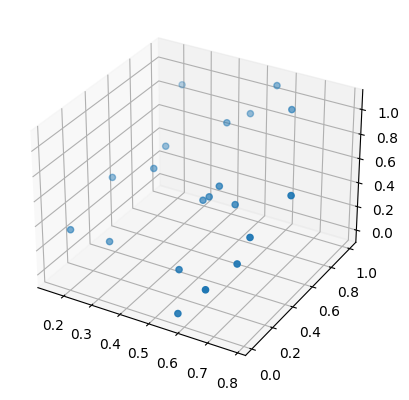

Covariance matrix dimensions are: [3, 3]

The eigenvalues are: tensor([0.0018, 0.0347, 0.1833])

The eigenvectors are:

w1: tensor([ 0.1140,  0.9934, -0.0111])

w2: tensor([ 0.7032, -0.0728,  0.7073])

w3: tensor([-0.7018,  0.0884,  0.7068])

Subspace V: 

tensor([[-0.7018,  0.7032],
        [ 0.0884, -0.0728],
        [ 0.7068,  0.7073]])
Checking orthonormality 

v1 ° v2 = 4.656612873077393e-10
v1 L2 norm = 0.9999999403953552
v2 L2 norm = 1.0
X - mean: 

tensor([[ 0.0470,  0.3859, -0.2032, -0.2624, -0.0288,  0.2900,  0.2205,  0.0126,
          0.0725,  0.3511, -0.3194,  0.2382, -0.0053, -0.2429, -0.1622,  0.1241,
         -0.2447, -0.1850,  0.0126, -0.4604],
        [-0.0187, -0.1742,  0.0436,  0.1492, -0.0518, -0.1802, -0.1905, -0.0366,
         -0.0642, -0.2451,  0.1193, -0.1352, -0.0647,  0.1237,  0.0441, -0.1632,
          0.0928,  0.0691, -0.0167,  0.2242],
        [-0.0283, -0.2117,  0.1596,  0.1132,  0.0806, -0.1099, -0.0300,  0.0241,
         -0.0083, -0.1060,  0.2001, -0.103

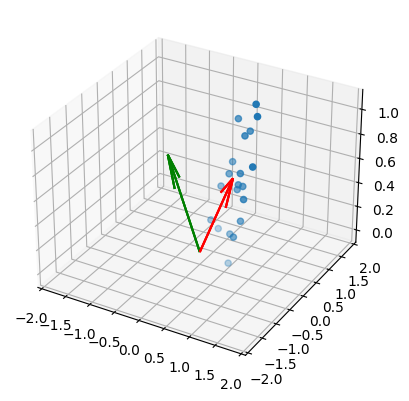

Plotting data with dimensions reduced


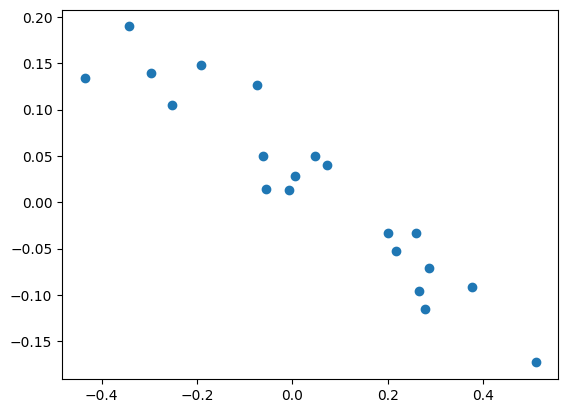

In [12]:
def main():
    points_numer = 20
    mean = 0
    std = 0.05
    centroid = [mean, mean, mean]
    X = generate_points(points_numer, mean, std)
    Cov_X = cov_matrix(X)
    D, W = eigenvectors_eigenvalues(Cov_X)
    V = creating_subspace(D, W)
    check_orthonormality(V)
    X_mean_sustracted = matrix_mean(X)
    Xp, simple_Xp = projection(X_mean_sustracted, V)
    plot_X_V_3D(X, V, centroid)
    X_prime = dim_reduction(simple_Xp, V)
    print("Plotting data with dimensions reduced")
    plt.scatter(X_prime[0, :], X_prime[1, :])
    plt.show()
if __name__ == "__main__":
    main()    